1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
import seaborn as sb

%matplotlib inline

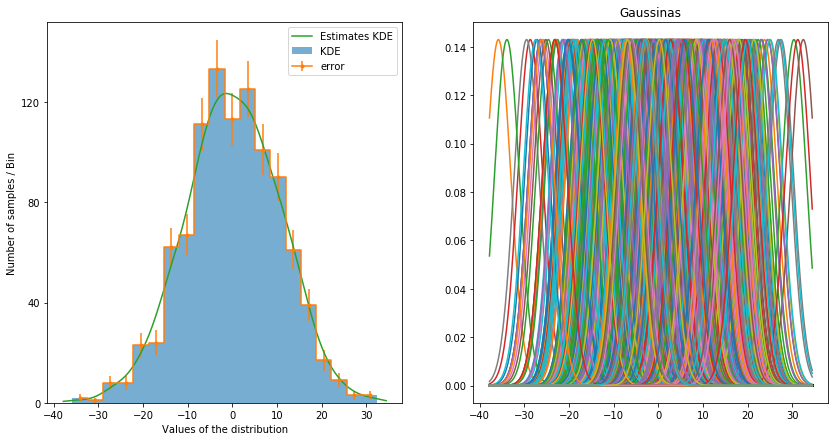

In [3]:
mean = 0
sigma = 10
samples = 1000
x = np.random.normal(mean, sigma, samples)

# Plot KDE
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
number_bins = 20
y, edges, bins = ax1.hist(x, bins = number_bins, label='KDE', alpha=0.6)
ax1.set_ylabel("Number of samples / Bin")
ax1.set_xlabel("Values of the distribution")
ax1.yaxis.set_major_locator(MultipleLocator(samples//25))
central = 1/2*(edges[1:] + edges[:-1])
ax1.errorbar(central, y, yerr = y**-0.5, marker = '.', drawstyle = 'steps-mid', label = 'error')
ax1.legend()
std = 1.06 * x.std() * x.size**(-1/5)

# Create Gaussians
pdf = []
for k in x:
    ls = np.linspace(x.min()-2, x.max()+2, num=samples)
    gauss = norm(k, std)
    pdf.append(gauss.pdf(ls))
    ax2.plot(ls, pdf[-1])
ax2.set_title('Gaussinas')

# Sum up Gaussians
# Each pdf has integral of 1, because it is a probability
gauss_sum = np.sum(pdf, axis=0)/samples*(sp.integrate.trapz(y, x = edges[1:])) 
ax1.plot(ls, gauss_sum, label='Estimates KDE')
ax1.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2018-11-27 14:59:21--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-11-27 14:59:22--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc42a30e0d6a784bd3cf9f943e6c.dl.dropboxusercontent.com/cd/0/inline/AWbLF3axlib7w534zWcV1YN7NkouPS1N0Q3ERnuE9JnUrQVFQYx9oF-uxq8xOUSrRXePboQ1Q1iVhB1QZ-Q_GKFqkbERCeTek0pQyfUkKLeWWKLXCb4d5Ukqwm4bMQjc87FQrGtSlh1tvdkYH-UMFYMblgrgigVS8F4X-jrh_s0I_d9B4wMCXO_NPwPHpvziZRE/file [following]
--2018-11-27 14:59:22--  https://uc42a30e0d6a784bd3cf9f943e6c.dl.dropboxusercontent.com/cd/

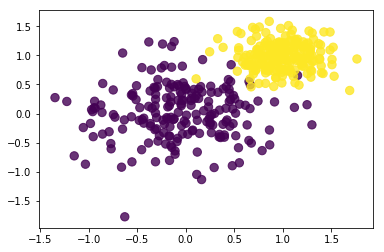

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

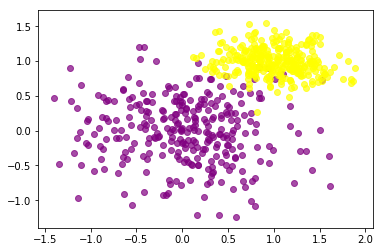

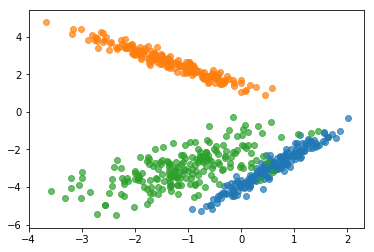

In [130]:
# Create the fist set of data
sample = 300
mean_1 = [0, 0]
cov_1 = [[0.4, 0], [0, 0.2]]
norm_1 = np.random.multivariate_normal(mean_1, cov_1, sample)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(x=norm_1[:,0], y=norm_1[:,1], marker='o', c='purple', alpha = 0.7)

# Create the second set of data
mean_2 = [1, 1]
cov_2 = [[0.1, 0], [0, 0.04]]
norm_2 = np.random.multivariate_normal(mean_2, cov_2, sample)

# Plot
ax.scatter(x=norm_2[:,0], y=norm_2[:,1], marker='o', c='yellow', alpha = 0.7)

# Genaralization with N > 2
def norm_scattered(N = 2, samp = 200, avg = [-5,5], std = [-1,1]):
    fig, ay = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    for i in range(N):
        mean = np.random.uniform(avg[0], avg[1], size=2)
        cov = np.random.uniform(std[0], std[1], size=(2,2))
        # We need a semipositive covariance
        cov = cov.dot(cov.T)
        gauss  = np.random.multivariate_normal(mean, cov, samp)
        ay.scatter(x=gauss[:,0], y=gauss[:,1], marker='o', alpha = 0.7)
        
norm_scattered(3)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [132]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2018-12-04 00:42:02--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2018-12-04 00:42:02--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde848c2d99fb325f030d7a45c9.dl.dropboxusercontent.com/cd/0/inline/AWydjXUHvZqDH3F7rKW6P9qXeN7m2yq3IpaLX3RDsfDi0Wk0qnHMZGgCYsAMJROlbXVBLKZQdzWouv5kpUBEwWPot3QeNwO_tOg_Hfs0CpG17uvV_T9vKE55Lp333Rr5nSKUsk93068F-YiqrGRbX5o-OiBvJw_hHNJvvaS_35vlR0wwB4hML9K8LviQ_U2OAwI/file [following]
--2018-12-04 00:42:03--  https://ucde848c2d99fb325f030d7a45c9.dl.dropboxusercontent.com/cd/0/inline/AWydjXUHvZqDH3F7rKW6P9qXeN7m2yq3I

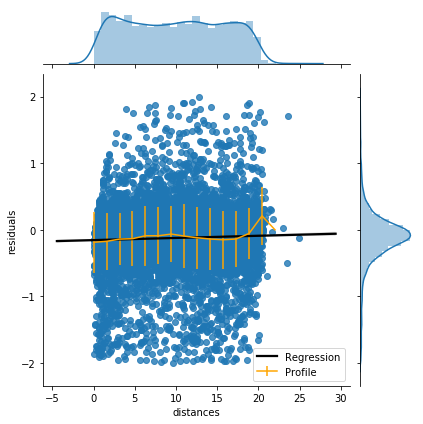

In [156]:
data = pd.DataFrame(np.load('residuals_261.npy').item())
data = data[abs(data['residuals'])< 2]
linregres = sp.stats.linregress(data['distances'], data['residuals'])

sb.jointplot(data['distances'], data['residuals'], kind="reg", line_kws={'color':'black', 'label':'Regression'})

num_bins = 15
x = np.linspace(0,22, num_bins)
df = df.sort_values('distances')

y = np.zeros(num_bins)
erry = np.zeros(len(x))
count = 0
prev = x[0]

# Count element inside each bin
for i in range(1, len(x)):
    data_tmp = data[data['distances'] < x[i]]
    dat_bin = data_tmp[data_tmp['distances'] >= x[i-1]]
    y[i-1] = dat_bin['residuals'].mean()
    erry[i-1] = dat_bin['residuals'].std()
    
plt.errorbar(x, y, yerr=erry, color='orange', label='Profile')
plt.legend()